In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for NaN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import numpy as np

In [2]:
df =pd.read_csv(".\input_data\BeauAMP1.1.0.csv" )
df = df.drop(columns=["Unnamed: 0"])

print(len(df))

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\jch_m\AppData\Local\Temp\ipykernel_15244\611284864.py:1: SyntaxWarning: invalid escape sequence '\i'
  df =pd.read_csv(".\input_data\BeauAMP1.1.0.csv" )
C:\Users\jch_m\AppData\Local\Temp\ipykernel_15244\611284864.py:1: DtypeWarning: Columns (1,16,58,77,78,90,92,95,102,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv(".\input_data\BeauAMP1.1.0.csv" )


1162969


In [3]:
print("there are ", len(df), " bids in the orginal database\n")

df = df[df['OBJECT'].str.contains("SPS ")]
print("there are ", len(df), " bids in the related to SPS\n")

columns_of_interest = ["OBJECT","AWARD_DATE", "AWARD_NOTICE_DATE", "CONTRACT_NOTICE_DATE", "AWARD_PRICE", "ESTIMATED_PRICE","CAE_SIREN",	"CAE_SIREN_NAME","CAE_STATED_ACTIVITY", "CAE_STATED_TYPE","CAE_TOWN","CAE_ZIP_CODE", "CONTRACT_TYPE", "CPV","DURATION","WIN_SIREN_NAME","WIN_SIRET","WIN_CITY_CODE","WIN_STAFF","PROCEDURE_TYPE",	"P_CRITERION_WEIGHT",	"Q_CRITERIA_TEXT"	,"Q_CRITERIA_TYPE"	,"Q_CRITERIA_WEIGHTS"]
df_sps = df[columns_of_interest]
"""
ACCELERATED	ADVERTISING	AGP	AWARD_DATE	AWARD_NOTICE_DATE	AWARD_PRICE	BUSINESS_ASSOCIATION	CAE_STATED_NAME	CAE_SIREN	CAE_SIREN_NAME	
CAE_SIRET	CAE_SIRET_KNOWN	CAE_STATED_ACTIVITY	CAE_STATED_TYPE	CAE_TOWN	CAE_ZIP_CODE	
CENTRAL_PROCUREMENT	CONTRACTOR_SME	CONTRACT_NOTICE_DATE	CONTRACT_TYPE	
CORRECTIONS	CPV	DURATION	ENVIRONMENTAL_CLAUSE	ESTIMATED_PRICE	EXECUTION_SITE	FRAMEWORK_AGREEMENT	ID_BOAMP_AWARD	ID_BOAMP_CONTRACT	
ID_LOT	MAX_OFFER	MIN_OFFER	MULTI_WIN	NUMBER_EU_OFFERS	
NUMBER_LOTS	NUMBER_NON_EU_OFFERS	NUMBER_OFFERS	NUMBER_OFFERS_SME	OBJECT	ON_BEHALF	OUTCOME	
PROCEDURE_TYPE	P_CRITERION_WEIGHT	Q_CRITERIA_TEXT	Q_CRITERIA_TYPE	Q_CRITERIA_WEIGHTS	RENEWABLE	SOCIAL_CLAUSE	
SUBCONTRACTING	THRESHOLD	WIN_COUNTRY_CODE	WIN_STATED_NAME	WIN_SIREN	WIN_SIREN_NAME	WIN_SIRET	
WIN_SIRET_KNOWN	WIN_TOWN	WIN_ZIP_CODE	CAE_LEGAL_STATUS	CAE_LEGAL_STATUS_NAME	CAE_EMPLOYER
CAE_STAFF	CAE_MAIN_ACTIVITY	CAE_SSE	CAE_CREATION	CAE_MAIN_ACTIVITY_CODE	CAE_ACTIVITY_VERSION
WIN_LEGAL_STATUS	WIN_LEGAL_STATUS_NAME	WIN_EMPLOYER	WIN_STAFF	WIN_SSE	WIN_MISSION	WIN_STILL_ACTIVE	WIN_ACTIVITY_VERSION	WIN_ACTIVITY_LEVEL_1	WIN_ACTIVITY_LEVEL_2	WIN_ACTIVITY_LEVEL_3	WIN_ACTIVITY_LEVEL_4	WIN_ACTIVITY_LEVEL_5	WIN_MAIN_ACTIVITY	WIN_CREATION_DATE	CAE_AGENCY_EMPLOYER	CAE_AGENCY_STAFF	CAE_AGENCY_MAIN_ACTIVITY	CAE_AGENCY_CREATION	CAE_AGENCY_MAIN_ACTIVITY_CODE	CAE_AGENCY_ACTIVITY_VERSION	CAE_HEADQUARTERS	CAE_CITY_CODE	CAE_GPS	CAE_DEPARTEMENT	WIN_AGENCY_ACTIVITY_LEVEL_1	WIN_AGENCY_ACTIVITY_LEVEL_2	WIN_AGENCY_ACTIVITY_LEVEL_3	WIN_AGENCY_ACTIVITY_LEVEL_4	WIN_AGENCY_ACTIVITY_LEVEL_5	WIN_AGENCY_ACTIVITY_VERSION	WIN_AGENCY_MAIN_ACTIVITY	WIN_AGENCY_CREATION_DATE	WIN_HEADQUARTERS	
WIN_CITY_CODE	WIN_GPS	WIN_DEPARTEMENT	CAE_EPCI	WIN_EPCI	CAE_EPCI_TYPE	WIN_EPCI_TYPE	WIN_REGION	CAE_REGION	RESERVED_CONTRACT	CAE_ADDRESS	WIN_ADDRESS
"""

for i in range (0,df_sps.columns.size,5):
    df_current = df_sps.iloc[:,i:i+5]
    print(df_current.head(3))



there are  1162969  bids in the orginal database

there are  1091  bids in the related to SPS

                                                 OBJECT  AWARD_DATE  \
1179  SPS de niveau 1 pour la création d'un bassin d...  2018-12-14   
2917  Missions de MOE hors MOP, OPC, CT et CSPS pour...  2016-08-05   
2918  Missions de MOE hors MOP, OPC, CT et CSPS pour...  2016-08-05   

     AWARD_NOTICE_DATE CONTRACT_NOTICE_DATE  AWARD_PRICE  
1179        2019-01-06           2018-08-02      63640.0  
2917        2016-11-20           2016-06-06      91620.0  
2918        2016-11-20           2016-06-06      91620.0  
      ESTIMATED_PRICE    CAE_SIREN                      CAE_SIREN_NAME  \
1179              NaN  217500016.0                      VILLE DE PARIS   
2917              NaN  180020026.0  CAISSE DES DEPOTS ET CONSIGNATIONS   
2918              NaN  180020026.0  CAISSE DES DEPOTS ET CONSIGNATIONS   

     CAE_STATED_ACTIVITY     CAE_STATED_TYPE  
1179    ACT_SERV_ADM_PUB  AUTOTRITE_REGI

In [4]:
print("there are unique CPV ",df_sps["CPV"].nunique())
print("there are unique CAE_SIREN ",df_sps["CAE_SIREN"].nunique())
print("there are unique WIN_SIRET ",df_sps["WIN_SIRET"].nunique())



there are unique CPV  85
there are unique CAE_SIREN  254
there are unique WIN_SIRET  494


In [5]:
df_sps.head(3)


,OBJECT,AWARD_DATE,AWARD_NOTICE_DATE,CONTRACT_NOTICE_DATE,AWARD_PRICE,ESTIMATED_PRICE,CAE_SIREN,CAE_SIREN_NAME,CAE_STATED_ACTIVITY,CAE_STATED_TYPE,...,DURATION,WIN_SIREN_NAME,WIN_SIRET,WIN_CITY_CODE,WIN_STAFF,PROCEDURE_TYPE,P_CRITERION_WEIGHT,Q_CRITERIA_TEXT,Q_CRITERIA_TYPE,Q_CRITERIA_WEIGHTS
1179,SPS de niveau 1 pour la création d'un bassin d...,2018-12-14,2019-01-06,2018-08-02,63640.0,NaN,217500016.0,VILLE DE PARIS,ACT_SERV_ADM_PUB,AUTOTRITE_REGIONAL,...,66.0,QUARTET,3.796484e+13,95574,3 to 5,open,20.0,"[""CRITÈRE 1 : PERTINANCE DE L'ORGANISATION POU...","['other', 'social']","[50.0, 30.0]"
2917,"Missions de MOE hors MOP, OPC, CT et CSPS pour...",2016-08-05,2016-11-20,2016-06-06,91620.0,NaN,180020026.0,CAISSE DES DEPOTS ET CONSIGNATIONS,AFF_ECO_FIN,ORG_DROIT_PUBLIC,...,30.0,DEC,5.278847e+13,77462,NaN,open,30.0,"['VALEUR TECHNIQUE', ""PERFORMANCES EN MATIÈRE ...","['technical', 'environmental']","[60.0, 10.0]"
2918,"Missions de MOE hors MOP, OPC, CT et CSPS pour...",2016-08-05,2016-11-20,2016-06-06,91620.0,NaN,180020026.0,CAISSE DES DEPOTS ET CONSIGNATIONS,AFF_ECO_FIN,ORG_DROIT_PUBLIC,...,30.0,ATELIER 4 +,3.934303e+13,69382,NaN,open,30.0,"['VALEUR TECHNIQUE', ""PERFORMANCES EN MATIÈRE ...","['technical', 'environmental']","[60.0, 10.0]"


In [6]:
df_sps.shape
df_sps.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1091 entries, 1179 to 1160928
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECT                1091 non-null   object 
 1   AWARD_DATE            893 non-null    object 
 2   AWARD_NOTICE_DATE     1091 non-null   object 
 3   CONTRACT_NOTICE_DATE  1075 non-null   object 
 4   AWARD_PRICE           887 non-null    float64
 5   ESTIMATED_PRICE       150 non-null    float64
 6   CAE_SIREN             1003 non-null   float64
 7   CAE_SIREN_NAME        995 non-null    object 
 8   CAE_STATED_ACTIVITY   961 non-null    object 
 9   CAE_STATED_TYPE       939 non-null    object 
 10  CAE_TOWN              1091 non-null   object 
 11  CAE_ZIP_CODE          1087 non-null   object 
 12  CONTRACT_TYPE         909 non-null    object 
 13  CPV                   934 non-null    object 
 14  DURATION              759 non-null    float64
 15  WIN_SIREN_NAME      

Moyenne de la durée des contrats : 37.17158541941151
Moyenne du prix d'attribution : 268162.9694926719
(668,)
(668,)


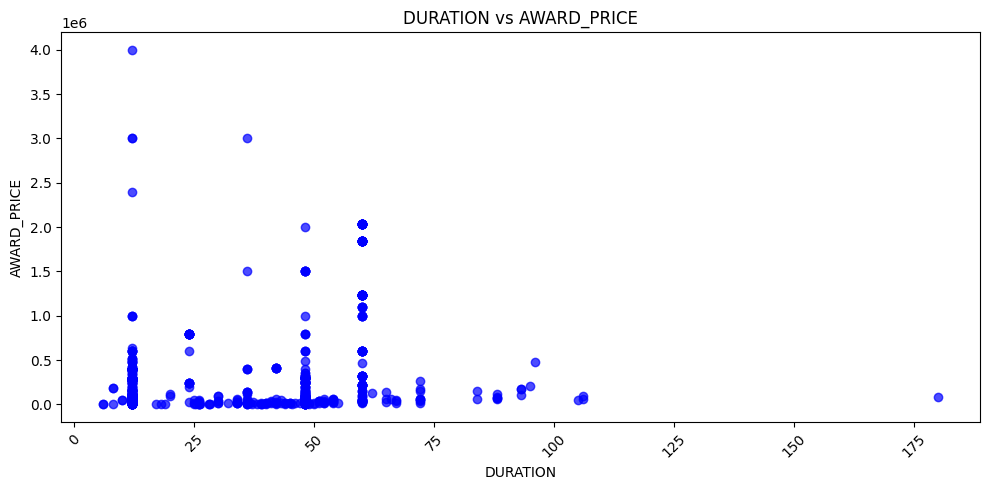

In [7]:
print("Moyenne de la durée des contrats :", df_sps['DURATION'].mean())
print("Moyenne du prix d'attribution :", df_sps['AWARD_PRICE'].mean())

df_p_d = df_sps[['DURATION', 'AWARD_PRICE']]
df_p_d = df_p_d.dropna()
df_p_d = df_p_d[df_p_d['AWARD_PRICE'] > 0]
print(df_p_d['DURATION'].shape)
print(df_p_d['AWARD_PRICE'].shape)
#adjust size of the figure to fit the data
plt.figure(figsize=(10, 5))
plt.scatter(df_p_d['DURATION'],df_p_d['AWARD_PRICE'], color='blue', alpha=0.7)
plt.title('DURATION vs AWARD_PRICE')
plt.xlabel('DURATION')
plt.ylabel('AWARD_PRICE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [8]:
df_sps.columns

Index(['OBJECT', 'AWARD_DATE', 'AWARD_NOTICE_DATE', 'CONTRACT_NOTICE_DATE',
       'AWARD_PRICE', 'ESTIMATED_PRICE', 'CAE_SIREN', 'CAE_SIREN_NAME',
       'CAE_STATED_ACTIVITY', 'CAE_STATED_TYPE', 'CAE_TOWN', 'CAE_ZIP_CODE',
       'CONTRACT_TYPE', 'CPV', 'DURATION', 'WIN_SIREN_NAME', 'WIN_SIRET',
       'WIN_CITY_CODE', 'WIN_STAFF', 'PROCEDURE_TYPE', 'P_CRITERION_WEIGHT',
       'Q_CRITERIA_TEXT', 'Q_CRITERIA_TYPE', 'Q_CRITERIA_WEIGHTS'],
      dtype='object')

In [9]:
df_sps_ML = df_sps[["AWARD_PRICE","AWARD_DATE", "CAE_SIREN_NAME","CAE_STATED_ACTIVITY", "CAE_STATED_TYPE","CAE_ZIP_CODE", "CONTRACT_TYPE", "CPV","DURATION","WIN_SIRET","WIN_CITY_CODE","PROCEDURE_TYPE","P_CRITERION_WEIGHT","Q_CRITERIA_TEXT"	,"Q_CRITERIA_TYPE"	,"Q_CRITERIA_WEIGHTS"]].copy()
df_sps_ML = df_sps_ML[df_sps_ML['AWARD_PRICE'] > 0]
print("there are ", len(df_sps_ML), " bids in the related to SPS and with a price > 0\n")
df_sps_ML = df_sps_ML.dropna()
print("there are ", len(df_sps_ML), " bids in the related to SPS and with a price > 0\n")

there are  887  bids in the related to SPS and with a price > 0

there are  524  bids in the related to SPS and with a price > 0



In [10]:
df_sps_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 1179 to 1110882
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AWARD_PRICE          524 non-null    float64
 1   AWARD_DATE           524 non-null    object 
 2   CAE_SIREN_NAME       524 non-null    object 
 3   CAE_STATED_ACTIVITY  524 non-null    object 
 4   CAE_STATED_TYPE      524 non-null    object 
 5   CAE_ZIP_CODE         524 non-null    object 
 6   CONTRACT_TYPE        524 non-null    object 
 7   CPV                  524 non-null    object 
 8   DURATION             524 non-null    float64
 9   WIN_SIRET            524 non-null    float64
 10  WIN_CITY_CODE        524 non-null    object 
 11  PROCEDURE_TYPE       524 non-null    object 
 12  P_CRITERION_WEIGHT   524 non-null    float64
 13  Q_CRITERIA_TEXT      524 non-null    object 
 14  Q_CRITERIA_TYPE      524 non-null    object 
 15  Q_CRITERIA_WEIGHTS   524 non-null    o

In [11]:
df_sps_ML.head()

,AWARD_PRICE,AWARD_DATE,CAE_SIREN_NAME,CAE_STATED_ACTIVITY,CAE_STATED_TYPE,CAE_ZIP_CODE,CONTRACT_TYPE,CPV,DURATION,WIN_SIRET,WIN_CITY_CODE,PROCEDURE_TYPE,P_CRITERION_WEIGHT,Q_CRITERIA_TEXT,Q_CRITERIA_TYPE,Q_CRITERIA_WEIGHTS
1179,63640.0,2018-12-14,VILLE DE PARIS,ACT_SERV_ADM_PUB,AUTOTRITE_REGIONAL,75004,['services'],71317210,66.0,3.796484e+13,95574,open,20.0,"[""CRITÈRE 1 : PERTINANCE DE L'ORGANISATION POU...","['other', 'social']","[50.0, 30.0]"
2917,91620.0,2016-08-05,CAISSE DES DEPOTS ET CONSIGNATIONS,AFF_ECO_FIN,ORG_DROIT_PUBLIC,75007,['services'],71300000,30.0,5.278847e+13,77462,open,30.0,"['VALEUR TECHNIQUE', ""PERFORMANCES EN MATIÈRE ...","['technical', 'environmental']","[60.0, 10.0]"
2918,91620.0,2016-08-05,CAISSE DES DEPOTS ET CONSIGNATIONS,AFF_ECO_FIN,ORG_DROIT_PUBLIC,75007,['services'],71300000,30.0,3.934303e+13,69382,open,30.0,"['VALEUR TECHNIQUE', ""PERFORMANCES EN MATIÈRE ...","['technical', 'environmental']","[60.0, 10.0]"
2919,33600.0,2016-08-05,CAISSE DES DEPOTS ET CONSIGNATIONS,AFF_ECO_FIN,ORG_DROIT_PUBLIC,75007,['services'],71521000,30.0,4.281309e+13,75106,open,40.0,"['VALEUR TECHNIQUE', ""PERFORMANCES EN MATIÈRE ...","['technical', 'environmental']","[50.0, 10.0]"
2920,12140.0,2016-08-05,CAISSE DES DEPOTS ET CONSIGNATIONS,AFF_ECO_FIN,ORG_DROIT_PUBLIC,75007,['services'],71631300,30.0,5.345230e+13,92044,open,50.0,"['VALEUR TECHNIQUE', ""PERFORMANCES EN MATIÈRE ...","['technical', 'environmental']","[40.0, 10.0]"


In [12]:

# Define the target variable
y = df_sps_ML['AWARD_PRICE']

# Define the feature matrix by dropping the target column
X = df_sps_ML.drop(columns=['AWARD_PRICE']).copy() # .copy() to ensure X is a separate DataFrame

# List of categorical columns to be one-hot encoded
categorical_features = [
    'AWARD_DATE', 'CAE_SIREN_NAME', 'CAE_STATED_ACTIVITY', 'CAE_STATED_TYPE',
    'CAE_ZIP_CODE', 'CONTRACT_TYPE', 'CPV', 'WIN_SIRET', 'WIN_CITY_CODE',
    'PROCEDURE_TYPE', 'P_CRITERION_WEIGHT', 'Q_CRITERIA_TEXT',
    'Q_CRITERIA_TYPE', 'Q_CRITERIA_WEIGHTS'
]

# Ensure all categorical features are of string type ---
print("\n--- Cleaning Categorical Features for OneHotEncoder ---")
for col in categorical_features:
    if col in X.columns: 
        X[col] = X[col].astype(str)
        #print(f"Column '{col}' converted to type: {X[col].dtype}")
    else:
        print(f"Warning: Column '{col}' not found in X. Skipping conversion.")

# List of numerical features to be scaled
numerical_features = ['DURATION']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor (ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features)
    ],
    remainder='drop' # Explicitly drop unlisted columns
)

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor), # Name this step 'preprocessor'
    ('poly', PolynomialFeatures(degree=3,interaction_only = True )),
    #('LinearReg', LinearRegression(fit_intercept=False)) # Name this step 'lr'
    #'Lasso', Lasso(alpha=0.1, max_iter=2000)) # Name this step 'lasso'
    ('Ridge', Ridge(alpha=0.1, max_iter=2000)) # Name this step 'lr'

])

# Fit the model
print("\n--- Fitting the pipeline ---")
pipeline_lr.fit(X_train, y_train)
print("Pipeline fitted successfully!")

# Make predictions
y_pred = pipeline_lr.predict(X_test)




--- Cleaning Categorical Features for OneHotEncoder ---

--- Fitting the pipeline ---
Pipeline fitted successfully!


R2 Score: 0.434
Mean Absolute Error: 141,799


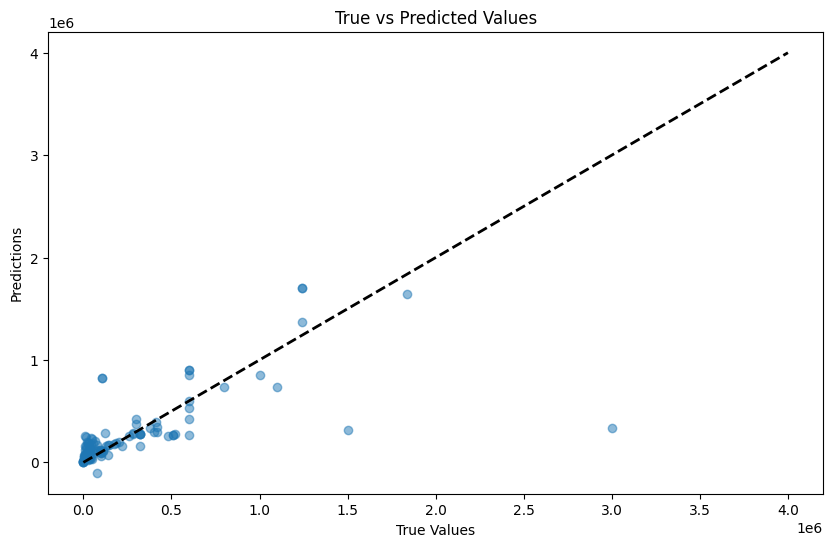

In [13]:
# Evaluate the model

print(f"R2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Absolute Error: {int(mean_absolute_error(y_test, y_pred)):,}")

import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()



--- Starting GridSearchCV for KernelRidge ---
Best KRR with params: {'kernelridge__alpha': 0.001, 'kernelridge__gamma': np.float64(0.01)} and R2 score: -191655211037.321
KRR complexity and bandwidth selected and model fitted in 14.592 s

--- Evaluation of Best KernelRidge Model on Test Set ---
R2 Score: 0.224
Mean Absolute Error: 167,675

Best KernelRidge estimator details:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['DURATION']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['AWARD_DATE',
                                                   'CAE_SIREN_NAME',
                                                   'CAE_STATED_ACTIVITY',
                                                   'CAE_STATED_TYPE',
                        

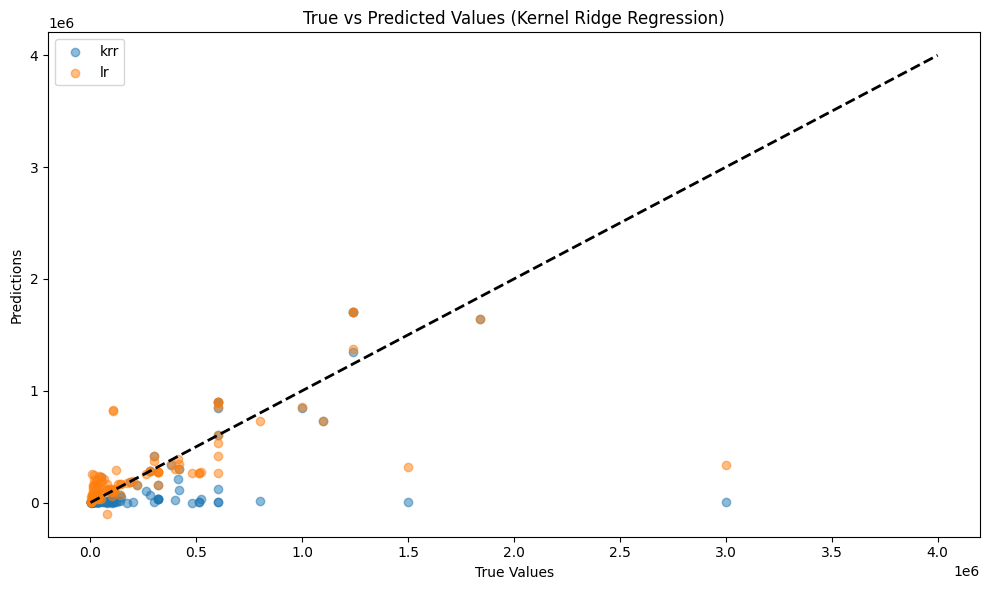

In [14]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import time

pipeline_krr = Pipeline(steps=[
    ('preprocessor', preprocessor), # Name this step 'preprocessor'
    ('poly', PolynomialFeatures(degree=3)),
    ('kernelridge', KernelRidge(kernel="rbf")) # Name this step 'kernelridge'
])

# Define the parameter grid for GridSearchCV
# Parameters for KernelRidge must be prefixed with its step name in the pipeline
param_grid_krr = {
    'kernelridge__alpha': [1e0, 0.1, 1e-2, 1e-3],
    'kernelridge__gamma': np.logspace(-2, 2, 5),
    #'degree': [2, 3, 4, 5] # For polynomial kernel
}

# Create GridSearchCV object
# You can also specify cv (cross-validation strategy), e.g., cv=5
grid_search_krr = GridSearchCV(
    pipeline_krr,        # Pass the pipeline to GridSearchCV
    param_grid=param_grid_krr,
    cv=5,                # 5-fold cross-validation
    scoring='neg_mean_squared_error',        # Metric to optimize (e.g., 'r2', 'neg_mean_squared_error')
    n_jobs=-1            # Use all available CPU cores
)

# Fit GridSearchCV to the training data
print("\n--- Starting GridSearchCV for KernelRidge ---")
t0 = time.time()
grid_search_krr.fit(X_train, y_train) # Fit on X_train, y_train
kr_fit = time.time() - t0

# Print best parameters and score
print(f"Best KRR with params: {grid_search_krr.best_params_} and R2 score: {grid_search_krr.best_score_:.3f}")
print(f"KRR complexity and bandwidth selected and model fitted in {kr_fit:.3f} s")

# Make predictions using the best model found by GridSearchCV
y_pred_krr = grid_search_krr.predict(X_test)

# Evaluate the best model
print(f"\n--- Evaluation of Best KernelRidge Model on Test Set ---")
print(f"R2 Score: {r2_score(y_test, y_pred_krr):.3f}")
print(f"Mean Absolute Error: {int(mean_absolute_error(y_test, y_pred_krr)):,}")

# You can also access the best estimator directly:
best_krr_model = grid_search_krr.best_estimator_
print("\nBest KernelRidge estimator details:")
print(best_krr_model)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_krr, alpha=0.5, label='krr')
plt.scatter(y_test, y_pred, alpha=0.5, label='lr')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (Kernel Ridge Regression)')
plt.legend()
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best model with params: {'lasso__alpha': 0.001, 'poly__degree': 2} 
Best Lasso R2: 0.355
Best Lasso MAE: 129247.3


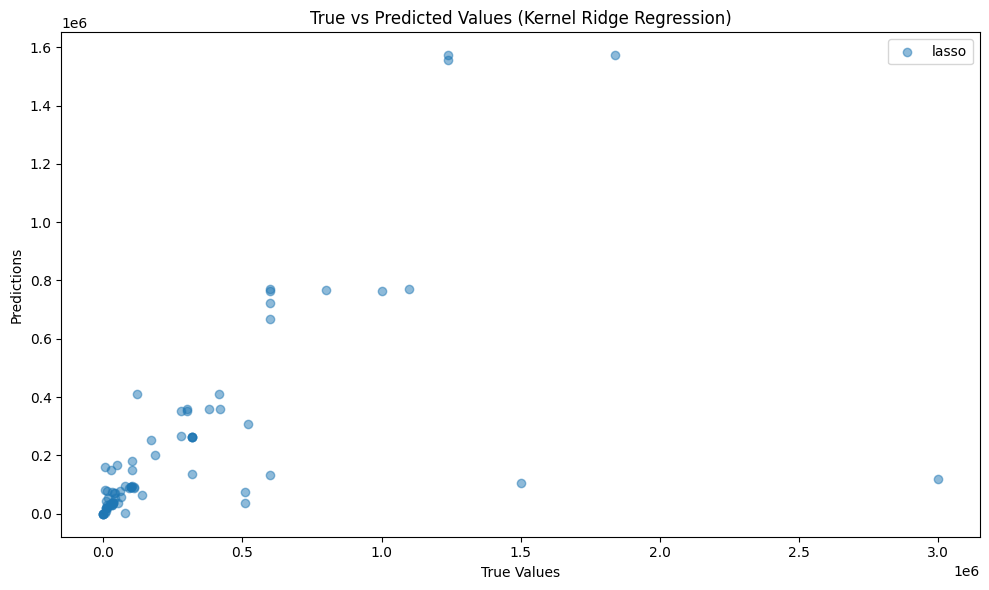

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming df_sps is already loaded and cleaned

# 1. Data Preparation and Log Transformation
y = np.log1p(df_sps_ML['AWARD_PRICE'])  # Log transform the target
X = df_sps_ML.drop(columns=['AWARD_PRICE','CONTRACT_TYPE','Q_CRITERIA_TEXT']).copy()

numerical_features = ['DURATION']
categorical_features = [
    'AWARD_DATE', 'CAE_SIREN_NAME', 'CAE_STATED_ACTIVITY', 'CAE_STATED_TYPE',
    'CAE_ZIP_CODE', 'CPV', 'WIN_SIRET', 'WIN_CITY_CODE',
    'PROCEDURE_TYPE', 'P_CRITERION_WEIGHT', 'Q_CRITERIA_TYPE', 'Q_CRITERIA_WEIGHTS'
]

for col in categorical_features:
    if col in X.columns:
        X[col] = X[col].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 2. Pipeline Definition
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features)
    ],
    remainder='drop'
)

pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)), # Example: polynomial features
    ('lasso', Lasso(max_iter=3000))  # Lasso with increased max_iter
])

# 3. Hyperparameter Tuning (GridSearchCV)
param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1],
    'poly__degree': [2, 3] # Example: tuning polynomial degree
}

grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=3, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)
grid_search_lasso.fit(X_train, y_train)

# 4. Evaluation (on original scale)
y_pred_log = grid_search_lasso.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse transform predictions

# Inverse transform the test target for proper evaluation
y_test_original_scale = np.expm1(y_test)

print(f"Best model with params: {grid_search_lasso.best_params_} ")

r2 = r2_score(y_test_original_scale, y_pred)
mae = mean_absolute_error(y_test_original_scale, y_pred)

print(f"Best Lasso R2: {r2:.3f}")
print(f"Best Lasso MAE: {mae:.1f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original_scale, y_pred, alpha=0.5, label='lasso')

plt.plot([y_test_original_scale.min(), y_test_original_scale.max()], [y_test_original_scale.min(), y_test_original_scale.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (Lasso Gridsearch Polynomial)')
plt.legend()
plt.tight_layout()
plt.show()